In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import tensorflow.keras.layers as layer
from tensorflow.keras.layers.experimental import preprocessing
from math import floor, ceil
from tensorflow import keras
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
H=np.random.normal(loc=0.0001, scale=0.000009, size=(5000,5000))

In [4]:
print(H)

[[1.12092988e-04 9.29562030e-05 8.90507007e-05 ... 1.02005556e-04
  9.52024135e-05 9.23095731e-05]
 [1.01637280e-04 1.12479553e-04 1.02920972e-04 ... 9.86044248e-05
  1.01090561e-04 1.09362494e-04]
 [9.06685590e-05 9.93587673e-05 1.05058424e-04 ... 1.02390496e-04
  9.12811581e-05 9.65448039e-05]
 ...
 [1.05660190e-04 1.01462335e-04 1.03062777e-04 ... 8.94085177e-05
  9.71474977e-05 1.03885780e-04]
 [9.74925465e-05 1.15967627e-04 9.19032893e-05 ... 8.75349563e-05
  9.51667793e-05 1.05854381e-04]
 [1.08282855e-04 9.98874935e-05 9.97217478e-05 ... 9.45090045e-05
  1.00054886e-04 9.51730542e-05]]


In [5]:
#Tsup=np.random.normal(loc=65, scale=3, size=(5000,1))

In [6]:
Tsup=np.random.uniform(low=55, high=75, size=(5000,1))

In [7]:
print(Tsup)


[[67.19622304]
 [70.62583411]
 [63.03608583]
 ...
 [58.97087691]
 [58.63280036]
 [69.4401678 ]]


In [8]:
print("range of Tsup is: ",min(Tsup), "to", max(Tsup))

range of Tsup is:  [55.0009298] to [74.99962171]


In [12]:
P=np.random.uniform(low=7, high=20, size=(5000,1))

In [10]:
P=np.random.normal(loc=15, scale=2, size=(5000,1))

In [13]:
print(P)

[[ 8.6098098 ]
 [15.2070558 ]
 [15.41757284]
 ...
 [10.81485576]
 [ 9.5914414 ]
 [18.96289432]]


Text(0.5, 0, 'Value of P in kWh')

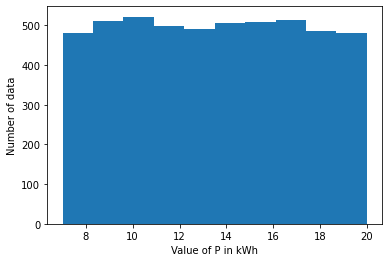

In [14]:
plt.hist(P)
plt.ylabel('Number of data')
plt.xlabel('Value of P in kWh')


In [15]:
print("range of P is: ",min(P), "to", max(P))

range of P is:  [7.00690308] to [19.99934915]


In [16]:
addd=np.matmul(H,P)

In [17]:
print(addd)

[[6.73507133]
 [6.75070752]
 [6.74295265]
 ...
 [6.74756564]
 [6.73421846]
 [6.73561081]]


In [18]:
#noise=np.random.normal(loc=1, scale=1, size=(5000,1))

In [19]:
noise=np.random.uniform(low=-3, high=3, size=(5000,1))

In [20]:
print(noise)

[[ 1.60863615]
 [ 2.32006517]
 [ 2.73412673]
 ...
 [-0.82090611]
 [-0.34997492]
 [-0.75942667]]


In [21]:
print("range of noise is: ",min(noise), "to", max(noise))

range of noise is:  [-2.99981082] to [2.99916628]


In [22]:
Tin_true=Tsup+addd+noise

In [23]:
print(Tin_true)

[[75.53993052]
 [79.69660681]
 [72.51316521]
 ...
 [64.89753643]
 [65.0170439 ]
 [75.41635194]]


In [24]:
print("range of Tin is: ",min(Tin_true), "to", max(Tin_true))

range of Tin is:  [59.07312755] to [84.61315778]


In [25]:
print(Tin_true.shape)

(5000, 1)


In [26]:
print(" range of Tin is: ", min(Tin_true) ,"  to  ", max(Tin_true) )

 range of Tin is:  [59.07312755]   to   [84.61315778]


In [885]:
X=P
y=Tin_true

In [886]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.10,shuffle=True)

In [887]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(4050, 1)
(450, 1)
(500, 1)


In [889]:
#ANN
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=128, activation='relu',input_shape=[1])) 
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
#ann.add(tf.keras.layers.Dense(units=512, activation='tanh'))
#ann.add(tf.keras.layers.Dense(units=256, activation='tanh'))
#ann.add(tf.keras.layers.Dense(units=128, activation='tanh'))
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [890]:
optimizer=keras.optimizers.Adam(learning_rate=0.0001) #best=0.001
ann.compile(optimizer = optimizer, loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])
ann.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 128)               256       
_________________________________________________________________
dense_140 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_141 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_142 (Dense)            (None, 1)                 129       
Total params: 33,409
Trainable params: 33,409
Non-trainable params: 0
_________________________________________________________________


In [891]:
checkpoint_name = './weights/Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [892]:
data_validate=(X_val,y_val)


In [893]:
history=ann.fit(x = X_train,y=y_train,batch_size=32,validation_data=data_validate, epochs = 100,callbacks=callbacks_list)

Epoch 1/100
127/127 [==============================] - ETA: 0s - loss: 66.3352 - mean_absolute_error: 66.3352
Epoch 00001: val_loss improved from inf to 58.50634, saving model to ./weights\Weights-001--58.50634.hdf5
127/127 [==============================] - 1s 4ms/step - loss: 66.3352 - mean_absolute_error: 66.3352 - val_loss: 58.5063 - val_mean_absolute_error: 58.5063
Epoch 2/100
124/127 [============================>.] - ETA: 0s - loss: 40.5487 - mean_absolute_error: 40.5487
Epoch 00002: val_loss improved from 58.50634 to 16.92273, saving model to ./weights\Weights-002--16.92273.hdf5
127/127 [==============================] - 0s 3ms/step - loss: 40.0882 - mean_absolute_error: 40.0882 - val_loss: 16.9227 - val_mean_absolute_error: 16.9227
Epoch 3/100
113/127 [=========================>....] - ETA: 0s - loss: 16.5898 - mean_absolute_error: 16.5898
Epoch 00003: val_loss improved from 16.92273 to 15.40828, saving model to ./weights\Weights-003--15.40828.hdf5
127/127 [===================

Epoch 23/100
121/127 [===========================>..] - ETA: 0s - loss: 14.0652 - mean_absolute_error: 14.0652
Epoch 00023: val_loss improved from 13.12775 to 12.91057, saving model to ./weights\Weights-023--12.91057.hdf5
127/127 [==============================] - 0s 3ms/step - loss: 14.0355 - mean_absolute_error: 14.0355 - val_loss: 12.9106 - val_mean_absolute_error: 12.9106
Epoch 24/100
125/127 [============================>.] - ETA: 0s - loss: 13.7235 - mean_absolute_error: 13.7235
Epoch 00024: val_loss improved from 12.91057 to 12.64135, saving model to ./weights\Weights-024--12.64135.hdf5
127/127 [==============================] - 0s 3ms/step - loss: 13.7470 - mean_absolute_error: 13.7470 - val_loss: 12.6413 - val_mean_absolute_error: 12.6413
Epoch 25/100
116/127 [==========================>...] - ETA: 0s - loss: 13.5984 - mean_absolute_error: 13.5984
Epoch 00025: val_loss improved from 12.64135 to 12.31919, saving model to ./weights\Weights-025--12.31919.hdf5
127/127 [===========

Epoch 46/100
113/127 [=========================>....] - ETA: 0s - loss: 5.1431 - mean_absolute_error: 5.1431
Epoch 00046: val_loss did not improve from 5.06537
127/127 [==============================] - 0s 2ms/step - loss: 5.1626 - mean_absolute_error: 5.1626 - val_loss: 5.1029 - val_mean_absolute_error: 5.1029
Epoch 47/100
106/127 [========================>.....] - ETA: 0s - loss: 5.1529 - mean_absolute_error: 5.1529
Epoch 00047: val_loss did not improve from 5.06537
127/127 [==============================] - 0s 2ms/step - loss: 5.1435 - mean_absolute_error: 5.1435 - val_loss: 5.0694 - val_mean_absolute_error: 5.0694
Epoch 48/100
103/127 [=======================>......] - ETA: 0s - loss: 5.1301 - mean_absolute_error: 5.1301
Epoch 00048: val_loss did not improve from 5.06537
127/127 [==============================] - 0s 2ms/step - loss: 5.1418 - mean_absolute_error: 5.1418 - val_loss: 5.0992 - val_mean_absolute_error: 5.0992
Epoch 49/100
114/127 [=========================>....] - ETA: 

114/127 [=========================>....] - ETA: 0s - loss: 5.1406 - mean_absolute_error: 5.1406
Epoch 00098: val_loss did not improve from 5.06537
127/127 [==============================] - 0s 2ms/step - loss: 5.1463 - mean_absolute_error: 5.1463 - val_loss: 5.0730 - val_mean_absolute_error: 5.0730
Epoch 99/100
117/127 [==========================>...] - ETA: 0s - loss: 5.1197 - mean_absolute_error: 5.1197
Epoch 00099: val_loss did not improve from 5.06537
127/127 [==============================] - 0s 2ms/step - loss: 5.1253 - mean_absolute_error: 5.1253 - val_loss: 5.0834 - val_mean_absolute_error: 5.0834
Epoch 100/100
119/127 [===========================>..] - ETA: 0s - loss: 5.1354 - mean_absolute_error: 5.1354
Epoch 00100: val_loss did not improve from 5.06537
127/127 [==============================] - 0s 2ms/step - loss: 5.1418 - mean_absolute_error: 5.1418 - val_loss: 5.0706 - val_mean_absolute_error: 5.0706


In [894]:
wights_file = './weights\Weights-038--5.07205.hdf5' # choose the best checkpoint 
ann.load_weights(wights_file) # load it
ann.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [895]:
y_annpred=ann.predict(X_test)
ann_error=np.sqrt(np.mean(np.square(y_test-y_annpred)))
print("rmse:",ann_error) #
mae = np.abs(y_test-y_annpred).mean()
print("Mean absolute error:",mae)

rmse: 5.936648447995859
Mean absolute error: 4.993269379334903


Text(0.5, 1.0, 'Frequency distribution of difference between true and predicted Tin ')

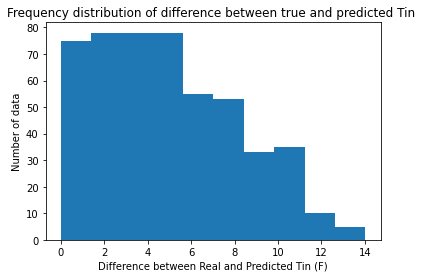

In [896]:
xx=[(i) for i in range(y_annpred.shape[0])]
plt.figure(1)
diff=abs(y_test-y_annpred)
#plt.plot(xx,diff)
plt.hist(diff)
#plt.plot(xx,y_test[0:10,:])
#plt.plot(xx,y_annpred[0:10,:])
plt.ylabel('Number of data')
plt.xlabel('Difference between Real and Predicted Tin (F)')
plt.title('Frequency distribution of difference between true and predicted Tin ')

Text(0.5, 1.0, 'Loss Convergence')

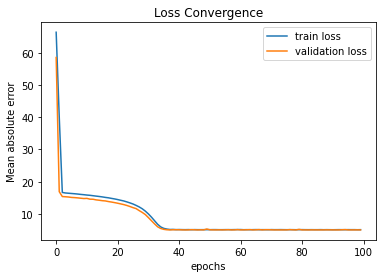

In [897]:
#print(history.history['loss'])
train_loss=history.history['loss']
val_loss=history.history['val_loss']
xloss=[(i) for i in range(len(train_loss))]
plt.plot(xloss,train_loss)
plt.plot(xloss,val_loss)
plt.xlabel('epochs')
plt.ylabel('Mean absolute error')
plt.legend(['train loss', 'validation loss'])
plt.title('Loss Convergence')

In [898]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [899]:
y_pred = regressor.predict(X_test) 

print(y_pred.shape)

error=np.sqrt(np.mean(np.square(y_test-y_pred)))  #without dayofweek 4.17803464
print("rmse:",error)
mae = np.abs(y_test-y_pred).mean()
print("Mean absolute error:",mae)


(500, 1)
rmse: 5.8292754056173
Mean absolute error: 4.9345213642673516


Text(0.5, 1.0, 'Frequency distribution of difference between true and predicted Tin ')

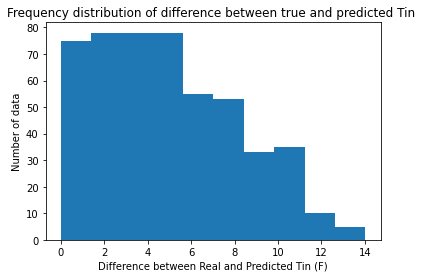

In [900]:
xx=[(i) for i in range(y_annpred.shape[0])]
plt.figure(1)
diff=abs(y_test-y_annpred)
#plt.plot(xx,diff)
plt.hist(diff)
#plt.plot(xx,y_test[0:10,:])
#plt.plot(xx,y_annpred[0:10,:])
plt.ylabel('Number of data')
plt.xlabel('Difference between Real and Predicted Tin (F)')
plt.title('Frequency distribution of difference between true and predicted Tin ')

In [901]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [902]:
#Random Forest
model = RandomForestRegressor()
model.fit(X_train,y_train.reshape(4050))

RandomForestRegressor()

In [903]:
y_rfpred=model.predict(X_test)
rf_error=np.sqrt(np.mean(np.square(y_test-y_rfpred)))
print("rmse:",rf_error)
mae = np.abs(y_test-y_rfpred).mean()
print("Mean absolute error:",mae)

rmse: 7.132514442806889
Mean absolute error: 5.831790807491033


Text(0.5, 1.0, 'Frequency distribution of difference between true and predicted Tin ')

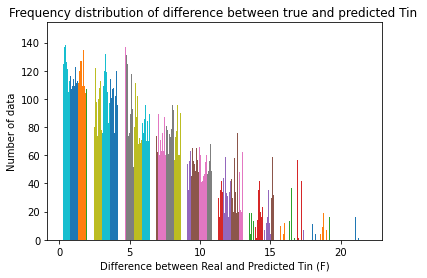

In [904]:
xx=[(i) for i in range(y_rfpred.shape[0])]
plt.figure(1)
diff=abs(y_test-y_rfpred)
#plt.plot(xx,diff)
plt.hist(diff)
#plt.plot(xx,y_test[0:10,:])
#plt.plot(xx,y_annpred[0:10,:])
plt.ylabel('Number of data')
plt.xlabel('Difference between Real and Predicted Tin (F)')
plt.title('Frequency distribution of difference between true and predicted Tin ')

In [905]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [906]:
y_knnpred=neigh.predict(X_test)
knn_error=np.sqrt(np.mean(np.square(y_test-y_knnpred)))
print("rmse:",knn_error) # k=11 4.101645
mae = np.abs(y_test-y_knnpred).mean()
print("Mean absolute error:",mae) # 2.86824

rmse: 6.145219984068366
Mean absolute error: 5.154404950641838


Text(0.5, 1.0, 'Frequency distribution of difference between true and predicted Tin ')

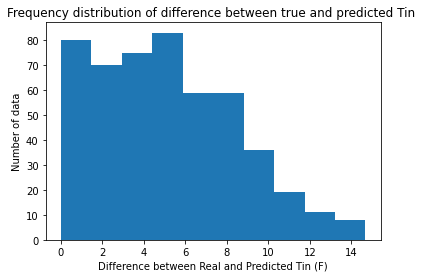

In [907]:
xx=[(i) for i in range(y_knnpred.shape[0])]
plt.figure(1)
diff=abs(y_test-y_knnpred)
#plt.plot(xx,diff)
plt.hist(diff)
#plt.plot(xx,y_test[0:10,:])
#plt.plot(xx,y_annpred[0:10,:])
plt.ylabel('Number of data')
plt.xlabel('Difference between Real and Predicted Tin (F)')
plt.title('Frequency distribution of difference between true and predicted Tin ')